利用深度學習辨識照片所在的國家

In [1]:
#import
#tensorflow(DL模型)
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as K
#檔案/影像處理

import numpy as np
import PIL
from IPython.display import Image
import matplotlib.pyplot as plt
import csv
import cv2
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



#google雲端硬碟存取
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#宣告變數
X_train=[]
Y_train=[]
X_test=[]
Y_test=[]
Y_tmp=[]
urls=[]
limit=10

In [3]:
#國家對照表
cc_id={}
id_name=[]
tmp=0
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/Dictionary_CC_CountryName.csv'
with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    cc_id[row[0]]=tmp
    id_name.append(row[3])
    tmp+=1

In [4]:
#讀取
tmp=1
fail=0
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/train.csv'
ty=[0 for i in range(252)]

with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)

  for row in rows:
    if tmp>limit:
      break
    try:
      response=requests.get(row[14]) #存取url
      with open("image.jpg", "wb") as f:
        f.write(response.content)
      try:
        img=image.load_img('image.jpg',target_size=(224,224)) #存取jpg圖檔
        resized_img=image.img_to_array(img) #轉換成array
        X_train.append(resized_img)
        ty=[0 for i in range(252)]
        ty[cc_id[row[19]]-1]=1
        Y_train.append(ty)
        tmp+=1
        if tmp%10==0:
          print(tmp)
      except:
        fail+=1
    except:
      fail+=1

10


In [ ]:
#存檔X
fail=0
with open('/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/train_img.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  for a in range(limit):
    for b in range(224):
      for c in range(224):
        writer.writerow(X_train[a][b][c])
    if (a+1)%10==0:
      print(a+1)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


In [ ]:
#存檔Y
STOP!!!

fail=0
tmp=1
with open('/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/train_country.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(Y_train)

In [ ]:
#讀檔X
X2_train=[]
tmp=1
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/train_img.csv'
with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    X2_train.append(row)
    tmp+=1
    if tmp/50176>limit:
      break
    if tmp%501760==0:
      print(tmp/50176)
X2_train=np.array(X2_train)

10.0
20.0


Exception ignored in: <function _xla_gc_callback at 0x7fc06872a820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


30.0
40.0


Exception ignored in: <function _xla_gc_callback at 0x7fc06872a820>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


50.0


KeyboardInterrupt: ignored

In [ ]:
#轉換資料X
Xf_train=np.zeros((limit,224,224,3))
tmp=0
for a in range(limit):
  for b in range(224):
    for c in range(224):
      Xf_train[a][b][c][0]=float(X2_train[tmp][0])
      Xf_train[a][b][c][1]=float(X2_train[tmp][1])
      Xf_train[a][b][c][2]=float(X2_train[tmp][2])
      tmp+=1
  if (a+1)%10==0:
    print(a+1)
Xf_train=Xf_train/255

NameError: ignored

In [ ]:
#讀取Y
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/train_country.csv'

with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    Y2_train=row

Yf_train=[]
for i in range(limit):
  Yf_train.append(int(Y2_train[i]))
Yf_train=np.array(Yf_train)
#Yf_train=Yf_train/252

In [ ]:
#輸出資料
#Xf_test.shape
Xf_train[0]
#img.show(X_train[0])
#Yf_train

array([[[0.9254902 , 0.92156863, 0.90588236],
        [0.9529412 , 0.95686275, 0.9372549 ],
        [0.9372549 , 0.94509804, 0.93333334],
        ...,
        [0.9529412 , 0.9490196 , 0.9411765 ],
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9411765 , 0.9411765 , 0.9411765 ]],

       [[0.9254902 , 0.92156863, 0.90588236],
        [0.9529412 , 0.95686275, 0.9372549 ],
        [0.93333334, 0.9411765 , 0.92941177],
        ...,
        [0.9490196 , 0.9411765 , 0.94509804],
        [0.9411765 , 0.9411765 , 0.9411765 ],
        [0.93333334, 0.93333334, 0.93333334]],

       [[0.92941177, 0.9254902 , 0.9098039 ],
        [0.94509804, 0.9490196 , 0.92941177],
        [0.92941177, 0.9372549 , 0.9254902 ],
        ...,
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.9490196 , 0.9490196 ],
        [0.9372549 , 0.9372549 , 0.9372549 ]],

       ...,

       [[0.9411765 , 0.9372549 , 0.92941177],
        [0.90588236, 0.9019608 , 0.89411765],
        [0.9411765 , 0

In [5]:
Xf_train=np.array(X_train)
Yf_train=np.array(Y_train)
Xf_train=Xf_train/255

In [6]:
#建立模型
model=keras.Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(252,activation='softmax'))

In [16]:
#編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate,0.0001)

In [17]:
#訓練
hist=model.fit(Xf_train[:limit],Yf_train[:limit],epochs=10)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 5.6967 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 3.4386 - accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 45ms/step - loss: 2.6872 - accuracy: 0.3000
Epoch 4/10
1/1 [==============================] - 0s 47ms/step - loss: 2.2346 - accuracy: 0.3000
Epoch 5/10
1/1 [==============================] - 0s 48ms/step - loss: 1.8071 - accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 48ms/step - loss: 1.8482 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 49ms/step - loss: 1.7946 - accuracy: 0.7000
Epoch 8/10
1/1 [==============================] - 0s 50ms/step - loss: 0.6814 - accuracy: 0.9000
Epoch 9/10
1/1 [==============================] - 0s 46ms/step - loss: 0.6080 - accuracy: 0.8000
Epoch 10/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5482 - accuracy: 0.7000


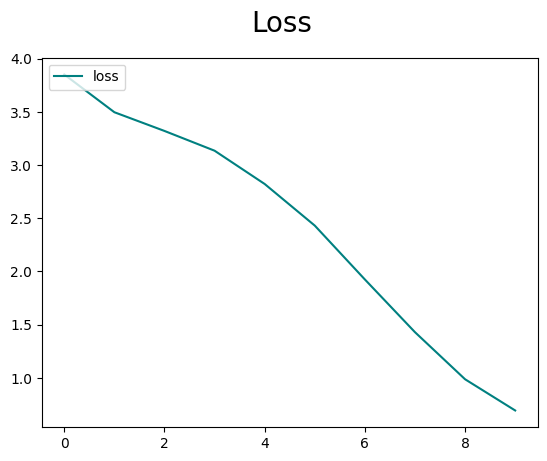

In [ ]:
#繪製圖表
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
#plt.plot(hist.history['accuracy'],color='orange',label='accuracy')
fig.suptitle("Loss",fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
#讀取
STOP!!!
tmp=1
fail=0
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/test.csv'
with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)

  for row in rows:
    if tmp>limit:
      break
    try:
      response = requests.get(row[14])
      with open("image.jpg", "wb") as f:
        f.write(response.content)
      try:
        img=image.load_img('image.jpg',target_size=(224,224))
        resized_img=image.img_to_array(img)
        #final_img=np.expand_dims(resized_img,axis=0)
        #final_img=tf.keras.applications.mobilenet.preprocess_input(final_img)
        X_test.append(resized_img)
        Y_test.append(cc_id[row[19]])
        tmp+=1
        if tmp%10==0:
          print(tmp)
      except:
        fail+=1
    except:
      fail+=1

10
20


In [ ]:
#存檔X
fail=0
STOP!!!

with open('/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/test_img.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)

  for a in range(limit):
    for b in range(224):
      for c in range(224):
        writer.writerow(X_test[a][b][c])
    if (a+1)%10==0:
      print(a+1)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


In [ ]:
#存檔Y
fail=0
tmp=1
STOP!!!

with open('/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/test_country.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(Y_test)

In [18]:
#讀檔X
X2_test=[]
tmp=1
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/test_img.csv'
with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    X2_test.append(row)
    tmp+=1
    if tmp/50176>limit:
      break
    if tmp%501760==0:
      print(tmp/50176)
X2_test=np.array(X2_test)

10.0


In [19]:
#轉換資料X
Xf_test=np.zeros((limit,224,224,3))
tmp=0
for a in range(limit):
  for b in range(224):
    for c in range(224):
      Xf_test[a][b][c][0]=float(X2_test[tmp][0])
      Xf_test[a][b][c][1]=float(X2_test[tmp][1])
      Xf_test[a][b][c][2]=float(X2_test[tmp][2])
      tmp+=1
  if (a+1)%10==0:
    print(a+1)
Xf_test=Xf_test/255

10


In [20]:
#讀取Y
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/test_country.csv'

with open(path, "r", newline='') as csvfile:
  rows = csv.reader(csvfile)
  for row in rows:
    Y2_test=row

Yf_test=[]
for i in range(limit):
  ty=[0 for i in range(252)]
  ty[int(Y2_test[i])-1]=1
  Yf_test.append(ty)
Yf_test=np.array(Yf_test)
#Yf_test=Yf_test/252

In [21]:
#測試
test_loss,test_acc=model.evaluate(Xf_test,Yf_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 265ms/step - loss: 10.0656 - accuracy: 0.1000
Test accuracy: 0.10000000149011612


In [ ]:
#儲存模型
model.save('/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/model2_3.h5')

In [ ]:
#載入模型
model=load_model('/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/model2_0.h5')

In [23]:
#預測
predictions=model.predict(Xf_test)
print(predictions[int(input())])

1/1 [==============================] - 0s 91ms/step
0
[1.04785249e-04 9.86930172e-05 1.46063932e-04 1.58283510e-05
 2.54724237e-05 5.46141586e-04 4.04856910e-05 1.83538286e-04
 2.49607147e-05 6.19346247e-05 2.61245499e-04 1.43992715e-04
 7.25143036e-05 3.77519522e-04 6.76286800e-05 1.07014253e-04
 4.48238367e-04 5.71222154e-06 3.47061796e-05 6.27582340e-05
 4.26092083e-05 2.83741083e-05 4.26575309e-04 3.30616022e-04
 5.45734692e-05 4.39681826e-05 3.73395560e-05 4.26170329e-04
 3.27077723e-05 4.43245692e-04 2.44390249e-05 1.74151719e-05
 2.23231054e-05 3.79539779e-05 4.83719021e-04 8.31752477e-05
 1.87085956e-04 2.06637269e-04 2.41772323e-05 1.12769296e-04
 1.37169758e-04 1.27654203e-04 2.18017685e-05 4.93610751e-05
 2.96062117e-05 2.56813892e-05 3.19495768e-04 6.38001133e-04
 8.70347958e-06 9.07096328e-05 3.82130645e-04 1.04488181e-05
 7.80490082e-05 4.92575709e-05 9.49142195e-05 1.50667373e-04
 1.20593584e-04 2.74046488e-05 4.28408869e-02 1.22827783e-04
 2.29506550e-05 4.02572296e-05 

In [24]:
n=int(input())
maxm=[0,0,0,0,0]
id=[-1,-1,-1,-1,-1]

for i in range(252):
  for j in range(5):
    if predictions[n][i]>maxm[j]:
      for k in range(4-j):
        maxm[4-k]=maxm[3-k]
        id[4-k]=id[3-k]
      maxm[j]=predictions[n][i]
      id[j]=i
      break

for i in range(5):
  print("#"+str(i+1)+" "+id_name[id[i]]+" with "+str(maxm[i])+" confidence")

print()
print("Correct answer is: "+id_name[Yf_test[n]])
plt.imshow(Xf_test[n])

0
#1 Indonesia with 0.25726348 confidence
#2 Niue with 0.24348658 confidence
#3 Faroe Islands with 0.14333425 confidence
#4 Haiti with 0.13572216 confidence
#5 Equatorial Guinea with 0.05880259 confidence



TypeError: ignored

1/1 [==============================] - 0s 29ms/step
#1 United States with 0.2598838 confidence
#2 United Kingdom with 0.14097784 confidence
#3 Italy with 0.08319184 confidence
#4 Sweden with 0.072253756 confidence
#5 India with 0.060256515 confidence
#6 New Zealand with 0.025727337 confidence
#7 Japan with 0.011008126 confidence
#8 South Korea with 0.008892113 confidence
#9 Montenegro with 0.006993963 confidence
#10 Portugal with 0.006628082 confidence


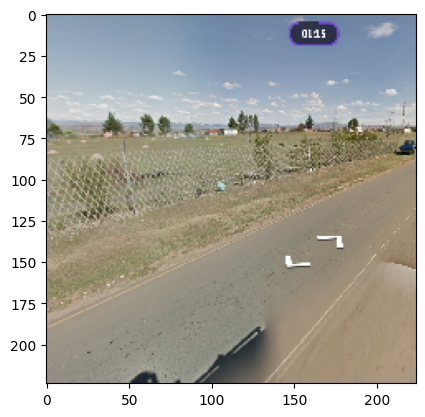

In [ ]:
Xf_test=[]
path='/content/drive/MyDrive/31123傅珩育科技應用專題資料夾/dataset/擷取.PNG'
img=image.load_img(path,target_size=(224,224))
resized_img=image.img_to_array(img)
Xf_test.append(resized_img)
Xf_test=np.array(Xf_test)
Xf_test=Xf_test/255
plt.imshow(Xf_test[0])
predictions=model.predict(Xf_test)

maxm=[0 for i in range(10)]
id=[-1 for i in range(10)]

for i in range(252):
  for j in range(10):
    if predictions[n][i]>maxm[j]:
      for k in range(4-j):
        maxm[4-k]=maxm[3-k]
        id[4-k]=id[3-k]
      maxm[j]=predictions[n][i]
      id[j]=i
      break

#print(predictions[n])
for i in range(10):
  print("#"+str(i+1)+" "+id_name[id[i]]+" with "+str(maxm[i])+" confidence")